In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

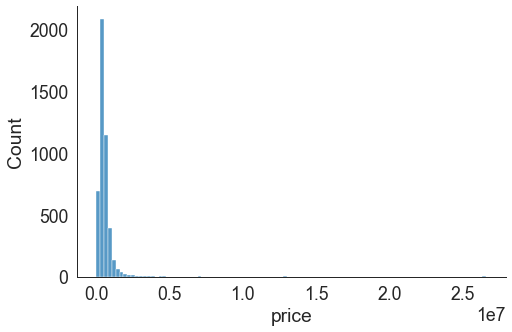

In [6]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="price", kind="hist", bins = 100, aspect = 1.5)

In [7]:
price = df["price"].values

Fitting 106 distributions:  28%|███████████████▎                                      | 30/106 [00:09<00:36,  2.11it/s]C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3094: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 106 distributions:  31%|████████████████▊                                     | 33/106 [00:32<06:42,  5.51s/it]C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  

Fitting 106 distributions: 100%|█████████████████████████████████████████████████████| 106/106 [05:36<00:00,  3.18s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponweib,5.656571e-15,7004.550759,-189669.207167,inf,0.034730,2.956283e-05
geninvgauss,5.656730e-15,6231.177171,-189669.077980,inf,0.036807,7.516167e-06
laplace,1.158363e-14,13456.450740,-186388.908838,inf,0.118063,2.529535e-56
dgamma,1.298940e-14,13139.070535,-185853.589274,inf,0.117393,1.089845e-55
moyal,1.361762e-14,11436.396249,-185644.759954,inf,0.045128,1.405272e-08


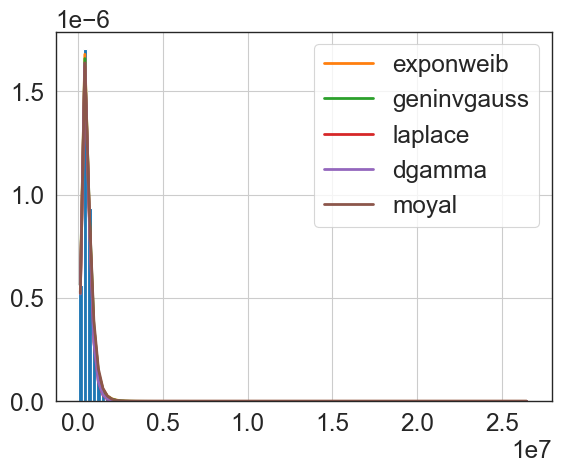

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [8]:
f = Fitter(price)
f.fit()
f.summary()

In [11]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.89s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,2.632022e-13,4270.471599,-172021.592596,inf,0.124415,1.608957e-62
rayleigh,7.725909e-13,60871.811388,-167068.188783,inf,0.203228,4.781414e-167
norm,1.251762e-12,72461.800244,-164848.422721,inf,0.219197,1.473231e-194
expon,1.592242e-12,7465.599243,-163741.705076,inf,0.259516,9.269313e-274
uniform,4.069296e-12,3423.209153,-159425.400439,inf,0.919669,0.000000e+00


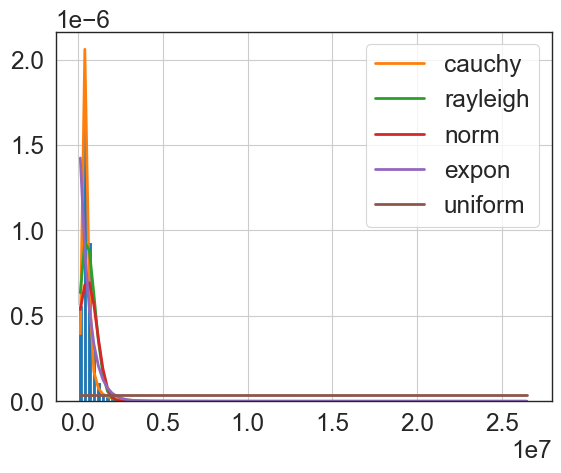

In [13]:
f = Fitter(price,
           distributions=['cauchy',
                         'chi2',
                         'expon',
                         'exponpow',
                         'gamma',
                         'lognorm',
                         'norm',
                         'powerlaw',
                         'rayleigh',
                         'uniform'])
f.fit()
f.summary()

In [14]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 440285.20002010616, 'scale': 142473.19320617476}}

In [16]:
f.fitted_param["cauchy"]

(440285.20002010616, 142473.19320617476)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
